In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
dataset = pd.read_json("cars.json")

In [5]:

## print shape of dataset with rows and columns
print(dataset.shape)

(2598, 12)


In [6]:
## print the top5 records
dataset.head()


,id,image,title,params,year,volume,engine,transmision,miles,link,price_ru,price_usd
0,1,https://avcdn.av.by/advertpreview/0000/2672/74...,"Peugeot 806 221, 7 мест","1998 г.механика, 2.0 л, бензин300 000 км",1998,2.0,бензин,механика,300000,/peugeot/806/100352674,7062,2750
1,2,https://avcdn.av.by/advertpreview/0000/2115/71...,Peugeot 308 T7,"2008 г.механика, 1.6 л, дизель295 819 км",2008,1.6,дизель,механика,295819,/peugeot/308/100264252,14894,5800
2,3,https://avcdn.av.by/advertpreview/0000/2619/85...,Peugeot 307 I,"2004 г.механика, 1.4 л, дизель317 000 км",2004,1.4,дизель,механика,317000,/peugeot/307/100344387,7576,2950
3,4,https://avcdn.av.by/advertpreview/0000/2513/11...,Peugeot 308 T9,"2016 г.механика, 1.6 л, дизель131 000 км",2016,1.6,дизель,механика,131000,/peugeot/308/100293543,29917,11650
4,5,https://avcdn.av.by/advertpreview/0000/2547/53...,Peugeot 206 I,"2005 г.автомат, 1.4 л, бензин132 104 км",2005,1.4,бензин,автомат,132104,/peugeot/206/100332469,5136,2000


# Missing values

In [11]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')
    
print('done')

done


In [14]:
print("Id of cars {}".format(len(dataset.id)))


Id of cars 2598


# Numerical variables

In [15]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,id,year,volume,miles,price_ru,price_usd
0,1,1998,2.0,300000,7062,2750
1,2,2008,1.6,295819,14894,5800
2,3,2004,1.4,317000,7576,2950
3,4,2016,1.6,131000,29917,11650
4,5,2005,1.4,132104,5136,2000


In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'year' in feature]

year_feature

['year']

In [17]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

year [1998 2008 2004 2016 2005 2017 2015 2009 2007 2011 2002 2000 2006 2018
 2001 1999 2012 1997 2019 1994 2003 1996 2013 2014 2010 1993 1991 1995
 1992 1990 1983 1988 1986 1987 1989 2021 2020]


Text(0.5, 1.0, 'Car Price vs Year')

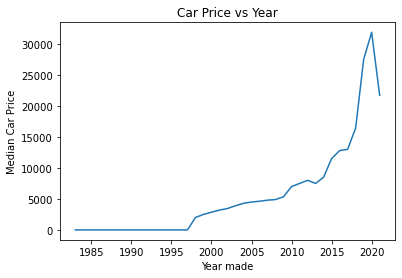

In [18]:

## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('year')['price_usd'].median().plot()
plt.xlabel('Year made')
plt.ylabel('Median Car Price')
plt.title("Car Price vs Year")

In [19]:
year_feature

['year']

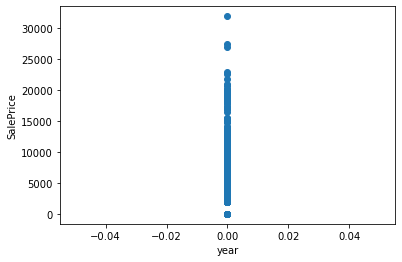

In [23]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['year']-data[feature]

        plt.scatter(data[feature],data['price_usd'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [24]:

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [26]:
dataset[discrete_feature].head()

,volume
0,2.0
1,1.6
2,1.4
3,1.6
4,1.4


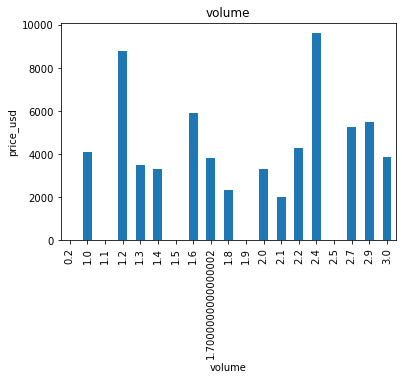

In [27]:

## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['price_usd'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price_usd')
    plt.title(feature)
    plt.show()

In [28]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


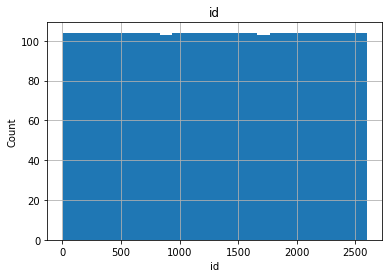

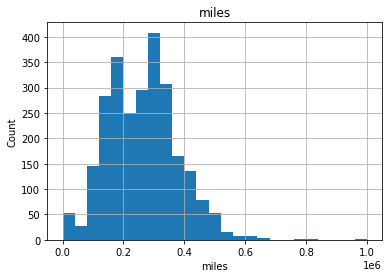

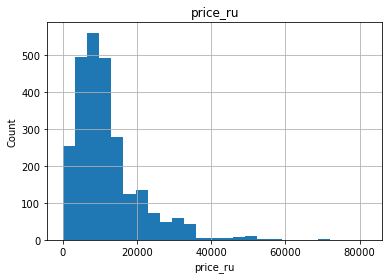

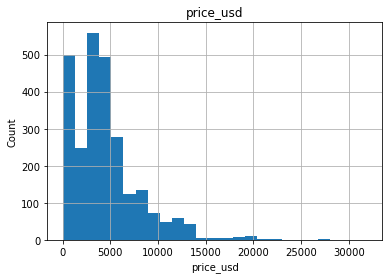

In [29]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

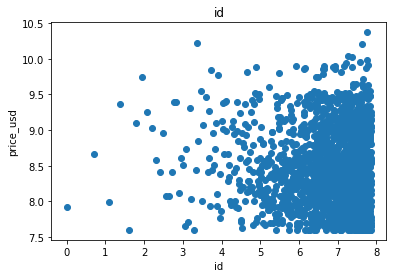

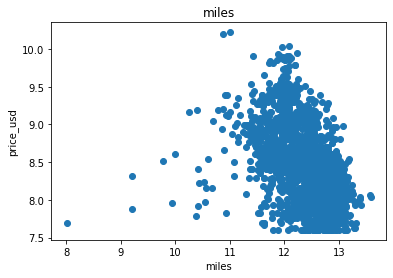

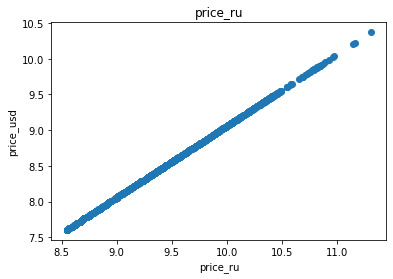

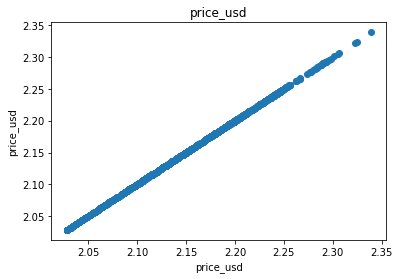

In [35]:

## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
#     if 0 in data[feature].unique():
#         pass
#     else:
    data[feature]=np.log(data[feature])
    data['price_usd']=np.log(data['price_usd'])
    plt.scatter(data[feature],data['price_usd'])
    plt.xlabel(feature)
    plt.ylabel('price_usd')
    plt.title(feature)
    plt.show()